<a href="https://colab.research.google.com/github/Joh-Ishimwe/Data-Preprocessing/blob/master/Part_1_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Augmentation
Objective: Expand an existing dataset using synthetic data, perturbation, and augmentation techniques.


# Load the dataset

In [51]:
import numpy as np
import pandas as pd

# Load the dataset
path = '/content/customer_transactions.csv'
df = pd.read_csv(path)

# Display first 10 rows
df.head(10)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3
5,120,1006,395,2024-01-06,Groceries,1.1
6,182,1007,91,2024-01-07,Sports,4.9
7,186,1008,429,2024-01-08,Clothing,4.3
8,174,1009,228,2024-01-09,Electronics,3.8
9,174,1010,112,2024-01-10,Sports,2.6


In [52]:
# Get information about data types and missing values
df.info()

# Get summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


#Step 2: Data Cleaning & Handling Missing Values

In [53]:
# Check for missing values
print(df.isnull().sum())

customer_id_legacy     0
transaction_id         0
purchase_amount        0
purchase_date          0
product_category       0
customer_rating       10
dtype: int64


In [55]:
# Fill missing customer_rating values with median imputation:
df['customer_rating'].fillna(df['customer_rating'].median(), inplace=True)

<ipython-input-55-7defe411dded>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_rating'].fillna(df['customer_rating'].median(), inplace=True)


In [ ]:
# Other imputation alternative for 'purchase_amount' (if it had missing values)
# df['purchase_amount'].fillna(df['purchase_amount'].mean(), inplace=True)

# # Other imputation alternative for 'product_category' (if it had missing values)
# df['product_category'].fillna(df['product_category'].mode()[0], inplace=True)


In [6]:
# Check for missing values again
print(df.isnull().sum())

customer_id_legacy    0
transaction_id        0
purchase_amount       0
purchase_date         0
product_category      0
customer_rating       0
dtype: int64


#Step 3: Data Augmentation Strategies

In [56]:
# Let Product_category be the target variable
target_distribution = df['product_category'].value_counts()

# Print the target distribution
print(target_distribution)

product_category
Sports         35
Electronics    34
Clothing       28
Groceries      28
Books          25
Name: count, dtype: int64


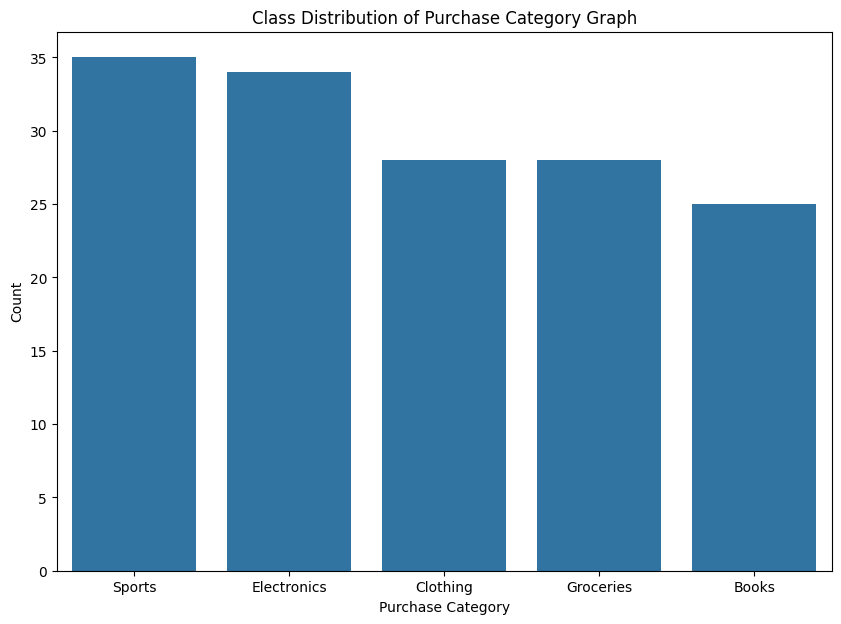

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the class distribution
plt.figure(figsize=(10, 7))
sns.countplot(x='product_category', data=df)
plt.title('Class Distribution of Purchase Category Graph')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

In [58]:
# Add random noise to purchase_amount
noise = np.random.normal(0, 10, size=len(df))
df['purchase_amount'] = df['purchase_amount'] + noise

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['product_category_encoded'] = le.fit_transform(df['product_category'])


In [60]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_for_smote = [col for col in numerical_cols if col != 'purchase_date']
X = df[numerical_cols_for_smote]
y = df['product_category']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [62]:
#Create a DataFrame with resampled data, adding back 'purchase_date' and 'product_category'
df_resampled = pd.DataFrame(X_resampled, columns=numerical_cols_for_smote)
# Instead of assigning original values, repeat the purchase_date values to match the new length
df_resampled['purchase_date'] = np.tile(df['purchase_date'].values, int(np.ceil(len(df_resampled) / len(df))))[:len(df_resampled)]
df_resampled['product_category'] = y_resampled

print("Before SMOTE:\n", df['product_category'].value_counts())
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())
print(df_resampled['product_category'].value_counts())
print(df_resampled.dtypes)


Before SMOTE:
 product_category
Sports         35
Electronics    34
Clothing       28
Groceries      28
Books          25
Name: count, dtype: int64
product_category
Sports         35
Electronics    35
Clothing       35
Groceries      35
Books          35
Name: count, dtype: int64
customer_id_legacy            int64
transaction_id                int64
purchase_amount             float64
customer_rating             float64
product_category_encoded      int64
purchase_date                object
product_category             object
dtype: object


In [44]:
# Feature Value Transformation
for col in numerical_cols:
    skewness = df_resampled[col].skew()
    print(f"Skewness of {col}: {skewness}")
    if skewness > 1:
        df_resampled[f'{col}_log'] = np.log1p(df_resampled[col])

# Display the updated DataFrame
print("\nDataFrame After Feature Transformation:")
print(df_resampled.head())

Skewness of customer_id_legacy: -0.13777956327176014
Skewness of transaction_id: -0.03441872903922623
Skewness of purchase_amount: 0.029743321096365568
Skewness of customer_rating: -0.06802702558836538
Skewness of product_category_encoded: 0.0

DataFrame After Feature Transformation:
   customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
0                 151            1001       403.744590              2.3   
1                 192            1002       323.526361              4.2   
2                 114            1003       448.681937              2.1   
3                 171            1004       263.368569              2.8   
4                 160            1005        55.900772              1.3   

   product_category_encoded purchase_date product_category  
0                         4    2024-01-01           Sports  
1                         2    2024-01-02      Electronics  
2                         2    2024-01-03      Electronics  
3                   

In [45]:
# Step 3.3: Create 'purchase_amount_noisy' column by adding random noise to 'purchase_amount'
df_resampled['purchase_amount_noisy'] = df_resampled['purchase_amount'] * np.random.uniform(0.9, 1.1, size=len(df_resampled))

# Step 3.4: Data Expansion
augmented_data = []
target_samples_per_class = 42


#Synthetic Data Generation

In [50]:
# 3. Synthetic Data Generation
# This function generates synthetic data by introducing variations to existing data points.
# It helps to increase the size of the dataset and improve model generalization.
# The variations are applied to purchase amount, product category, purchase date, and customer rating.

def generate_synthetic_data(df, num_samples=100):
    synthetic_data = df.sample(n=num_samples, replace=True).copy()  # <- Fix: Ensure a new copy

    # Apply variations
    synthetic_data['purchase_amount'] *= np.random.uniform(0.9, 1.1, size=num_samples)
    synthetic_data['product_category'] = np.random.choice(df['product_category'].unique(), size=num_samples)

    # Convert and modify dates
    synthetic_data['purchase_date'] = pd.to_datetime(synthetic_data['purchase_date'], errors='coerce')
    synthetic_data['purchase_date'] += pd.to_timedelta(np.random.randint(-3, 3, size=num_samples), unit='days')

    # Modify customer ratings within valid range
    synthetic_data['customer_rating'] += np.random.uniform(-0.2, 0.2, size=num_samples)
    synthetic_data['customer_rating'] = synthetic_data['customer_rating'].clip(lower=df['customer_rating'].min(),
                                                                              upper=df['customer_rating'].max())

    return synthetic_data

# Generate synthetic data and combine correctly
synthetic_data = generate_synthetic_data(df)
df_augmented = pd.concat([df_resampled, synthetic_data], ignore_index=True)

# Check results
print("\nShape of Augmented Dataset:", df_augmented.shape)
print("\nClass Distribution After Data Expansion:")
print(df_augmented['product_category'].value_counts())



Shape of Augmented Dataset: (275, 7)

Class Distribution After Data Expansion:
product_category
Groceries      57
Sports         56
Electronics    56
Clothing       54
Books          52
Name: count, dtype: int64


#Feature Engineering

In [28]:
# 1. Extract purchase_month
df_augmented['purchase_month'] = pd.to_datetime(df_augmented['purchase_date']).dt.month

# 2. Calculate avg_purchase_amount per customer
avg_purchase = df_augmented.groupby('customer_id_legacy')['purchase_amount'].mean().reset_index()
avg_purchase.columns = ['customer_id_legacy', 'avg_purchase_amount']
df_augmented = pd.merge(df_augmented, avg_purchase, on='customer_id_legacy', how='left')

In [29]:
# 3. Calculate days_since_last_purchase
df_augmented.sort_values(by=['customer_id_legacy', 'purchase_date'], inplace=True)
df_augmented['purchase_date'] = pd.to_datetime(df_augmented['purchase_date'], errors='coerce')
df_augmented.dropna(subset=['purchase_date'], inplace=True)
df_augmented['days_since_last_purchase'] = df_augmented.groupby('customer_id_legacy')['purchase_date'].diff().dt.days
df_augmented['days_since_last_purchase'].fillna(0, inplace=True)

<ipython-input-29-f5db9a43e470>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_augmented['days_since_last_purchase'].fillna(0, inplace=True)


#Export the Augmented Dataset

In [ ]:
# Save the augmented dataset
df_augmented.to_csv('customer_transactions_augmented.csv', index=False)